# Chapter 6: Hypothesis Testing

## Incomplete Data 

Creating accurate predictions is one of the most valuable skills in the job market today. Statisticians, economists, and data scientists use data gathered from specific populations in order to predict the future. Through computational and statistical techniques, we can make _statistical inferences_ to draw conclusions from data that are often incomplete.

As far as estimations of parameters that already exist, having full population data would mean that our questions about that population are answered. But because the cost of gathering a full set of information typically outweigh the benefits of having perfectly accurate data, we are okay with use data samples to draw inferences about past data and predict future observations. 

In [2]:
import numpy as np
import pandas as pd

In [3]:
mutual_fund_data = pd.read_csv("Top100MutualFunds.csv")
mutual_fund_data

,Symbol,Name,Category1,Category2,Category3,Morningstar Category,Morningstar Rating,Market cap,Current yield,Fees,Action
0,AGTHX,American Funds The Growth Fund of America Class A,US Equity,Broad market,Large cap,Large Growth,3.0,"$138,592,080,000",0.22%,0.62%,Analyze
1,FCNTX,Fidelity Contrafund Fund,US Equity,Broad market,Large cap,Large Growth,3.0,"$121,762,870,000",0.00%,0.74%,Analyze
2,CWMAX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.46%,0.63%,Analyze
3,CWMCX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",0.79%,1.40%,Analyze
4,CWMEX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.28%,0.87%,Analyze
...,...,...,...,...,...,...,...,...,...,...,...
95,FDTRX,Franklin DynaTech Fund Class R6,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.51%,Analyze
96,FDYZX,Franklin DynaTech Fund Advisor Class,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.62%,Analyze
97,BBVLX,Bridge Builder Large Cap Value Fund,US Equity,Broad market,Large cap,Large Value,4.0,"$9,500,000,000",1.55%,0.25%,Analyze
98,PEYAX,Putnam Large Cap Value Fund Class A,US Equity,Broad market,Large cap,Large Value,4.0,"$9,393,340,000",1.23%,0.91%,Analyze


In [7]:
mutual_fund_data["Category3"].value_counts()

Large cap                 88
Mid cap                    9
Health care                1
Communication Services     1
Small cap                  1
Name: Category3, dtype: int64

In [6]:
mutual_fund_data["Morningstar Rating"].value_counts(normalize = True)

3.0    0.432990
4.0    0.350515
5.0    0.195876
2.0    0.020619
Name: Morningstar Rating, dtype: float64

In [10]:
import pandas_datareader.data as web
import yfinance as yf
from datetime import datetime
mutual_fund_dict = {}
symbols = list(mutual_fund_data["Symbol"])
start = datetime(1980, 1,1)
end = datetime(2020, 1,1)
print(start, end, symbols)

1980-01-01 00:00:00 2020-01-01 00:00:00 ['AGTHX', 'FCNTX', 'CWMAX', 'CWMCX', 'CWMEX', 'CWMFX', 'AIVSX', 'AWSHX', 'ANCFX', 'AMCFX', 'CAFAX', 'CAFCX', 'CAFEX', 'CAFFX', 'FMACX', 'TRBCX', 'AFMFX', 'AMRFX', 'CMLAX', 'CMLCX', 'CMLEX', 'CMLFX', 'FDGRX', 'FBGRX', 'AMCPX', 'EAGRX', 'AMRMX', 'FMAGX', 'HACAX', 'FLPSX', 'PRGFX', 'PRNHX', 'DFQTX', 'DFEOX', 'FLPKX', 'RPMGX', 'FOCPX', 'CNGAX', 'CNGCX', 'CNGEX', 'CNGFX', 'FNEFX', 'FOCKX', 'DFLVX', 'CDDRX', 'CDDYX', 'CDIRX', 'CVIRX', 'TWCUX', 'EGFFX', 'EGFIX', 'ANEFX', 'HLIEX', 'FRDPX', 'FRDAX', 'FRDRX', 'FRISX', 'PRHSX', 'PRILX', 'DDFIX', 'DDFRX', 'VAFAX', 'PCBIX', 'FCGAX', 'FGSRX', 'FIFRX', 'PRFDX', 'PRBLX', 'JVMIX', 'VWNFX', 'FKGRX', 'PRDGX', 'AULDX', 'AULGX', 'AULNX', 'AULRX', 'AULYX', 'AKRSX', 'MFEIX', 'POLIX', 'FKDNX', 'MADVX', 'VWUSX', 'LSGRX', 'SEEGX', 'PRMTX', 'CUSUX', 'ERASX', 'ERSMX', 'DFSVX', 'CMGIX', 'SBLYX', 'AKRIX', 'MFEGX', 'FDNRX', 'FDTRX', 'FDYZX', 'BBVLX', 'PEYAX', 'TWCGX']


In [12]:
yf.pdr_override()
fund_data = web.get_data_yahoo(symbols, start, end)

[*********************100%***********************]  100 of 100 completed


In [13]:
close_data = fund_data["Adj Close"]
close_data

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,PRNHX,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-02,NaN,0.644044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.725494,...,0.599536,NaN,NaN,NaN,NaN,0.344126,NaN,NaN,NaN,1.501897
1980-01-03,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.721446,...,0.588704,NaN,NaN,NaN,NaN,0.336211,NaN,NaN,NaN,1.501897
1980-01-04,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.732577,...,0.595769,NaN,NaN,NaN,NaN,0.299273,NaN,NaN,NaN,1.501897
1980-01-07,NaN,0.672127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.735612,...,0.580033,NaN,NaN,NaN,NaN,0.304550,NaN,NaN,NaN,1.501897
1980-01-08,NaN,0.679616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753825,...,0.586269,NaN,NaN,NaN,NaN,0.311711,NaN,NaN,NaN,1.501897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,38.298397,43.498634,34.078846,41.269047,41.468189,28.316502,28.111416,38.422379,38.686325,51.326996,...,42.597168,80.298607,43.188065,32.569069,106.341019,29.883808,43.968906,14.698990,29.131346,36.265900
2019-12-26,38.386570,43.719612,34.225330,41.387012,41.586231,28.408516,28.203419,38.510830,38.775356,51.558979,...,42.654209,80.374329,43.536552,32.785183,107.248009,30.146881,44.383228,14.812883,29.243483,36.535656
2019-12-27,38.413013,43.711113,34.225330,41.441452,41.640713,28.400158,28.186689,38.537373,38.802055,51.608692,...,42.504475,80.290184,43.512787,32.761169,107.316467,30.130442,44.357861,14.819583,29.243483,36.501934


In [14]:
close_data["S&P 500"] = web.get_data_yahoo("^GSPC", start, end)["Adj Close"]

[*********************100%***********************]  1 of 1 completed


/var/folders/3j/6nrfh83n4n5dgx0fgb3pdh9c0000gn/T/ipykernel_79739/2240962843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_data["S&P 500"] = web.get_data_yahoo("^GSPC", start, end)["Adj Close"]


In [15]:
close_data

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-02,NaN,0.644044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.725494,...,NaN,NaN,NaN,NaN,0.344126,NaN,NaN,NaN,1.501897,105.760002
1980-01-03,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.721446,...,NaN,NaN,NaN,NaN,0.336211,NaN,NaN,NaN,1.501897,105.220001
1980-01-04,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.732577,...,NaN,NaN,NaN,NaN,0.299273,NaN,NaN,NaN,1.501897,106.519997
1980-01-07,NaN,0.672127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.735612,...,NaN,NaN,NaN,NaN,0.304550,NaN,NaN,NaN,1.501897,106.809998
1980-01-08,NaN,0.679616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753825,...,NaN,NaN,NaN,NaN,0.311711,NaN,NaN,NaN,1.501897,108.949997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,38.298397,43.498634,34.078846,41.269047,41.468189,28.316502,28.111416,38.422379,38.686325,51.326996,...,80.298607,43.188065,32.569069,106.341019,29.883808,43.968906,14.698990,29.131346,36.265900,3223.379883
2019-12-26,38.386570,43.719612,34.225330,41.387012,41.586231,28.408516,28.203419,38.510830,38.775356,51.558979,...,80.374329,43.536552,32.785183,107.248009,30.146881,44.383228,14.812883,29.243483,36.535656,3239.909912
2019-12-27,38.413013,43.711113,34.225330,41.441452,41.640713,28.400158,28.186689,38.537373,38.802055,51.608692,...,80.290184,43.512787,32.761169,107.316467,30.130442,44.357861,14.819583,29.243483,36.501934,3240.020020


<AxesSubplot:xlabel='Date'>

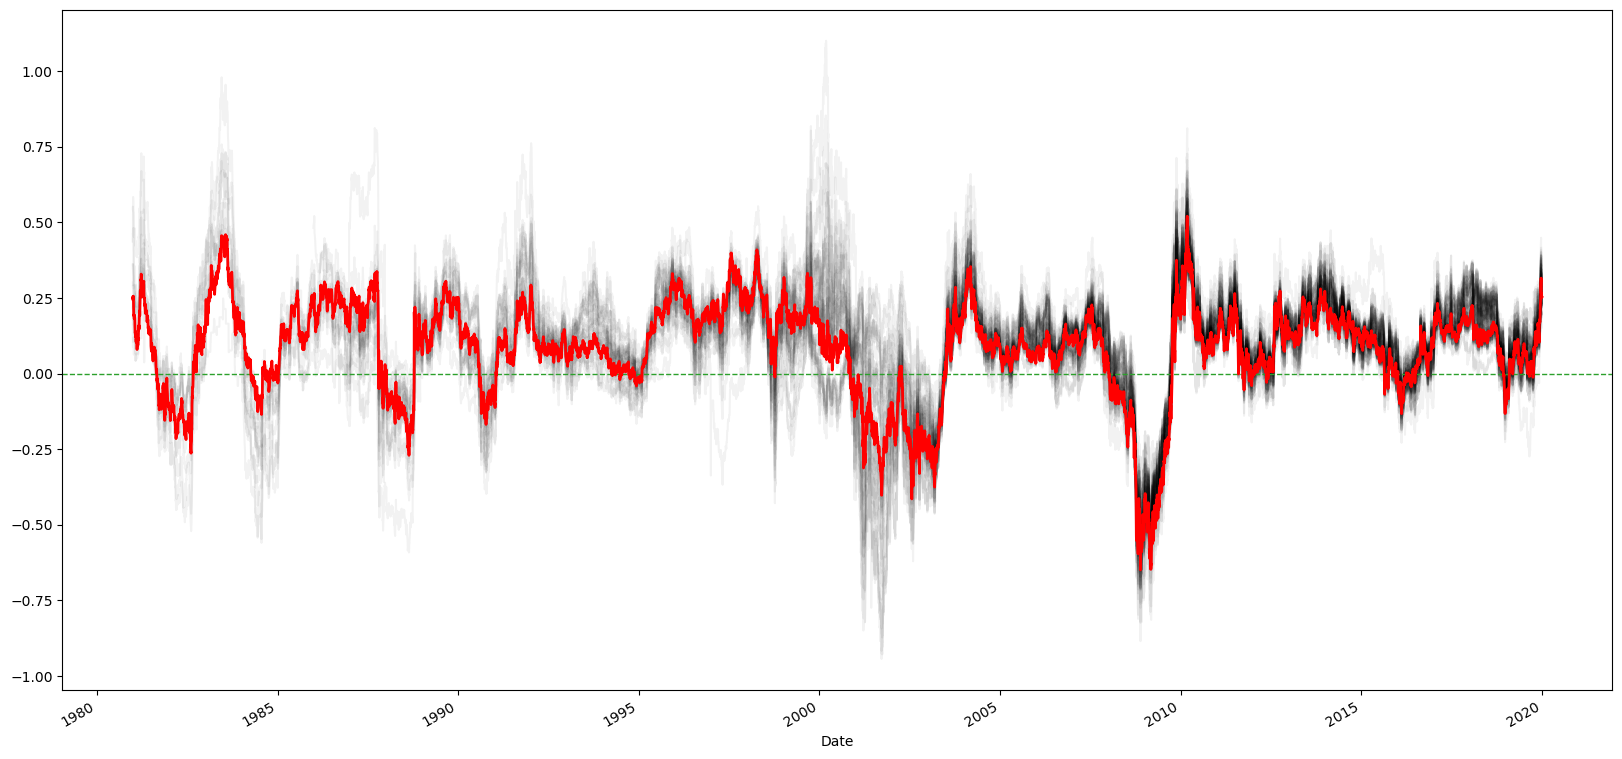

In [28]:
import matplotlib.pyplot as plt
# year over year rates of change are easier to interpret
yoy_return = np.log(close_data).diff(251)
fig, ax = plt.subplots(figsize = (20,10))
yoy_return.plot.line(legend = False, color = "k", alpha = .05, ax = ax)
ax.axhline(0, ls = "--", color = "C2", linewidth = 1)
yoy_return["S&P 500"].plot.line(color = "Red", linewidth = 2, ax = ax)